# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | klaksvik
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | magadan
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | praia da vitoria
Processing Record 6 of Set 1 | cascais
Processing Record 7 of Set 1 | spring creek
Processing Record 8 of Set 1 | namie
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | sola
Processing Record 11 of Set 1 | cambria
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | richards bay
Processing Record 16 of Set 1 | ribeira brava
Processing Record 17 of Set 1 | muzayri'
City not found. Skipping...
Processing Record 18 of Set 1 | leh
Processing Record 19 of Set 1 | cherdyn'
Processing Record 20 of Set 1 | remire-montjoly
Processing Record 21 of Set 1 | puerto ayora
Processing Record 2

Processing Record 37 of Set 4 | mitu
Processing Record 38 of Set 4 | chibougamau
Processing Record 39 of Set 4 | vernon
Processing Record 40 of Set 4 | bredasdorp
Processing Record 41 of Set 4 | dolzhanskaya
Processing Record 42 of Set 4 | akureyri
Processing Record 43 of Set 4 | nar'yan-mar
Processing Record 44 of Set 4 | turpan
Processing Record 45 of Set 4 | laguna
Processing Record 46 of Set 4 | san ignacio de velasco
Processing Record 47 of Set 4 | nadym
Processing Record 48 of Set 4 | mejit
Processing Record 49 of Set 4 | les cayes
Processing Record 0 of Set 5 | katsuura
Processing Record 1 of Set 5 | fort st. john
Processing Record 2 of Set 5 | rovinj
Processing Record 3 of Set 5 | saudarkrokur
Processing Record 4 of Set 5 | lompoc
Processing Record 5 of Set 5 | igarka
Processing Record 6 of Set 5 | benjamin constant
Processing Record 7 of Set 5 | mahajanga
Processing Record 8 of Set 5 | bayevo
Processing Record 9 of Set 5 | iquitos
Processing Record 10 of Set 5 | codrington
Pro

Processing Record 29 of Set 8 | lunsar
Processing Record 30 of Set 8 | katsuren-haebaru
Processing Record 31 of Set 8 | blair
Processing Record 32 of Set 8 | orikhiv
Processing Record 33 of Set 8 | brookings
Processing Record 34 of Set 8 | kaga bandoro
Processing Record 35 of Set 8 | kill devil hills
Processing Record 36 of Set 8 | selfoss
Processing Record 37 of Set 8 | labasa
Processing Record 38 of Set 8 | constantia
Processing Record 39 of Set 8 | kavaratti
Processing Record 40 of Set 8 | maceio
Processing Record 41 of Set 8 | paracuru
Processing Record 42 of Set 8 | la sarre
Processing Record 43 of Set 8 | aghajari
Processing Record 44 of Set 8 | yelizovo
Processing Record 45 of Set 8 | ahau
City not found. Skipping...
Processing Record 46 of Set 8 | auki
Processing Record 47 of Set 8 | kovalam
Processing Record 48 of Set 8 | barentu
Processing Record 49 of Set 8 | rukban
City not found. Skipping...
Processing Record 0 of Set 9 | smara
Processing Record 1 of Set 9 | darlowo
Proces

Processing Record 16 of Set 12 | sinjai
Processing Record 17 of Set 12 | talara
Processing Record 18 of Set 12 | tianchang
Processing Record 19 of Set 12 | dubinino
Processing Record 20 of Set 12 | nuuk
Processing Record 21 of Set 12 | asikkala
Processing Record 22 of Set 12 | araxa
Processing Record 23 of Set 12 | qaisumah
Processing Record 24 of Set 12 | ilek
Processing Record 25 of Set 12 | bandarbeyla
Processing Record 26 of Set 12 | mil'kovo
Processing Record 27 of Set 12 | nuku'alofa
Processing Record 28 of Set 12 | ormara
Processing Record 29 of Set 12 | pangai
Processing Record 30 of Set 12 | constitucion
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,klaksvik,62.2266,-6.5890,10.51,98,100,6.46,FO,1715417050
1,ushuaia,-54.8000,-68.3000,2.81,70,0,4.63,AR,1715416371
2,magadan,59.5667,150.8000,3.07,81,100,2.56,RU,1715416646
3,bilibino,68.0546,166.4372,0.25,78,100,1.17,RU,1715416585
4,praia da vitoria,38.7333,-27.0667,18.75,82,40,2.44,PT,1715416578


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,klaksvik,62.2266,-6.5890,10.51,98,100,6.46,FO,1715417050
1,ushuaia,-54.8000,-68.3000,2.81,70,0,4.63,AR,1715416371
2,magadan,59.5667,150.8000,3.07,81,100,2.56,RU,1715416646
3,bilibino,68.0546,166.4372,0.25,78,100,1.17,RU,1715416585
4,praia da vitoria,38.7333,-27.0667,18.75,82,40,2.44,PT,1715416578


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

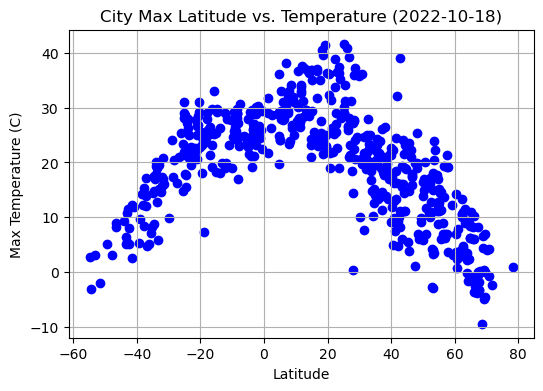

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue')
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/FigA.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

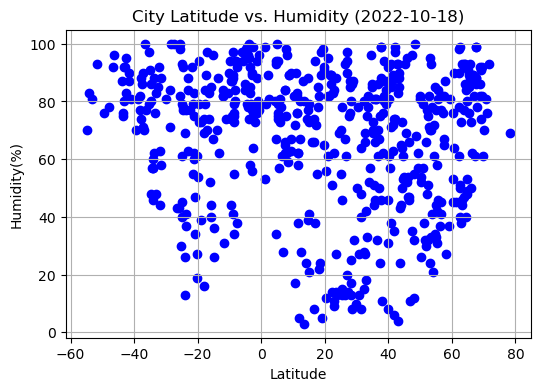

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='blue')
# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/FigB.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

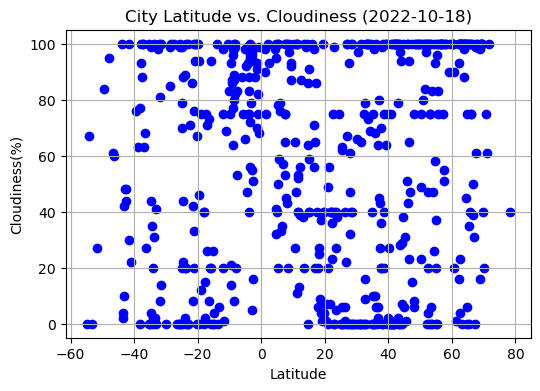

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='blue')
# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/FigC.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

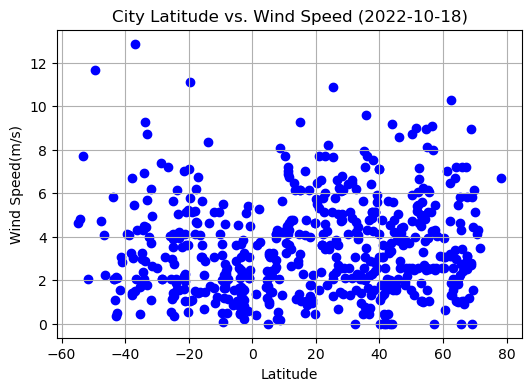

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='blue')
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/FigD.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Max Temp']

# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = st.linregress(x_value, y_value)

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,klaksvik,62.2266,-6.5890,10.51,98,100,6.46,FO,1715417050
2,magadan,59.5667,150.8000,3.07,81,100,2.56,RU,1715416646
3,bilibino,68.0546,166.4372,0.25,78,100,1.17,RU,1715416585
4,praia da vitoria,38.7333,-27.0667,18.75,82,40,2.44,PT,1715416578
5,cascais,38.6979,-9.4215,19.73,80,20,5.14,PT,1715417051


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,2.81,70,0,4.63,AR,1715416371
8,sola,-13.8833,167.5500,26.35,70,100,8.36,VU,1715416606
10,grytviken,-54.2811,-36.5092,-3.06,83,67,4.83,GS,1715416568
11,adamstown,-25.0660,-130.1015,21.81,79,99,5.63,PN,1715416566
13,richards bay,-28.7830,32.0377,24.00,71,99,7.39,ZA,1715416595


###  Temperature vs. Latitude Linear Regression Plot

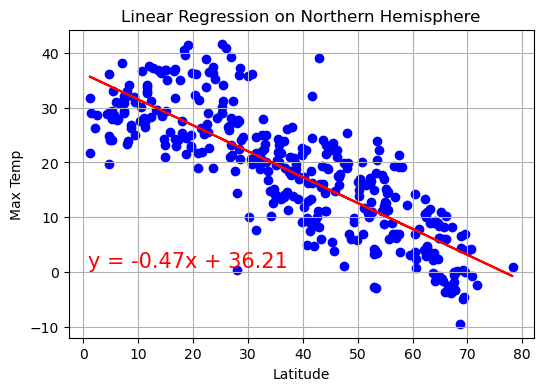

The r-value is: -0.8235640799505133


In [15]:

regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.figure(figsize=(6, 4))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], color='blue')
plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.title('Linear Regression on Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid(True)
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation,(0.8,0.8),fontsize=15,color="red")
plt.show()
r_value =northern_hemi_df['Lat'].corr(northern_hemi_df['Max Temp'])
print("The r-value is:", r_value)

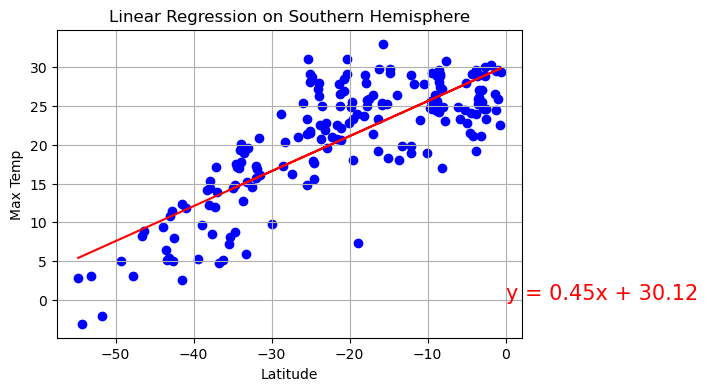

The r-value is: 0.8039014362393506


In [17]:
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Max Temp']
slope, intercept, r_value, p_value, std_err = st.linregress(x_value, y_value)
regress_svalues = southern_hemi_df['Lat'] * slope + intercept
plt.figure(figsize=(6, 4))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], color='blue')
plt.plot(southern_hemi_df['Lat'], regress_svalues, "r-")
plt.title('Linear Regression on Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid(True)
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation,(0.1,0.1),fontsize=15,color="red")
plt.show()
r_value =southern_hemi_df['Lat'].corr(southern_hemi_df['Max Temp'])
print("The r-value is:", r_value)

**Discussion about the linear relationship:** In the plotting of Northern Hemisphere, the r value calculated is less than 0.5 which indicates that there is negative association between Latitude and Max Temp, however it is not statistically significant. In the Southern Hemisphere the r value is significantly higher than 0.5 which indicates there is statistical significance between the Latitude and Max Tempertature and has a positive association.

### Humidity vs. Latitude Linear Regression Plot

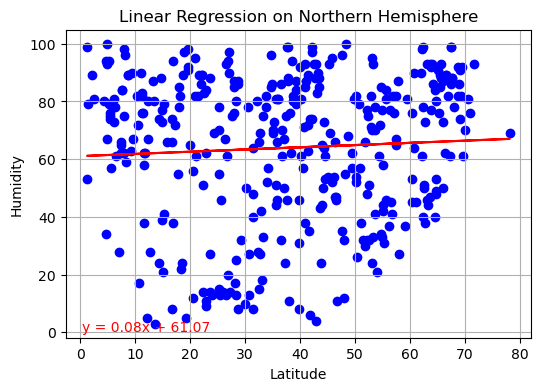

The r-value is: 0.05831418909813592


In [18]:
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Humidity']
slope, intercept, r_value, p_value, std_err = st.linregress(x_value, y_value)
regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.figure(figsize=(6, 4))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], color='blue')
plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.title('Linear Regression on Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation,(0.2,0.2),fontsize=10,color="red")
plt.show()
r_value =northern_hemi_df['Lat'].corr(northern_hemi_df['Humidity'])
print("The r-value is:", r_value)

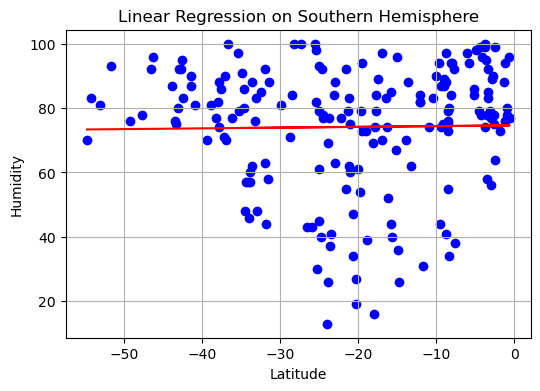

The r-value is: 0.01638576243403004


In [19]:
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Humidity']
slope, intercept, r_value, p_value, std_err = st.linregress(x_value, y_value)
regress_svalues = southern_hemi_df['Lat'] * slope + intercept
plt.figure(figsize=(6, 4))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], color='blue')
plt.plot(southern_hemi_df['Lat'], regress_svalues, "r-")
plt.title('Linear Regression on Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation,(5.8,0.8),fontsize=15,color="red")
plt.show()
r_value =southern_hemi_df['Lat'].corr(southern_hemi_df['Humidity'])
print("The r-value is:", r_value)

**Discussion about the linear relationship:** In the plotting of Northern Hemisphere and Southern Hemisphere, the r value calculated is below 0.5 with positive values, which indicates that there is no statistically significant impact between Latitude and Humidity and shows positive association.

### Cloudiness vs. Latitude Linear Regression Plot

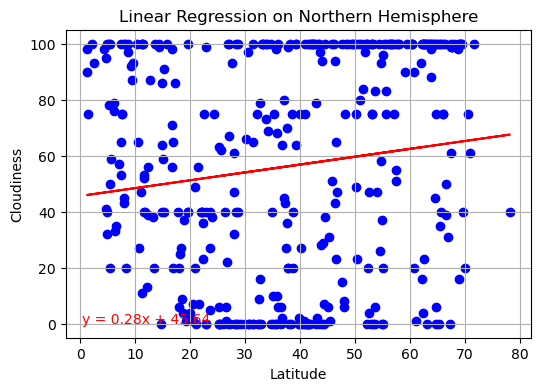

The r-value is: 0.13931837437631175


In [20]:
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Cloudiness']
slope, intercept, r_value, p_value, std_err = st.linregress(x_value, y_value)
regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.figure(figsize=(6, 4))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], color='blue')
plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.title('Linear Regression on Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation,(0.2,0.2),fontsize=10,color="red")
plt.show()
r_value =northern_hemi_df['Lat'].corr(northern_hemi_df['Cloudiness'])
print("The r-value is:", r_value)

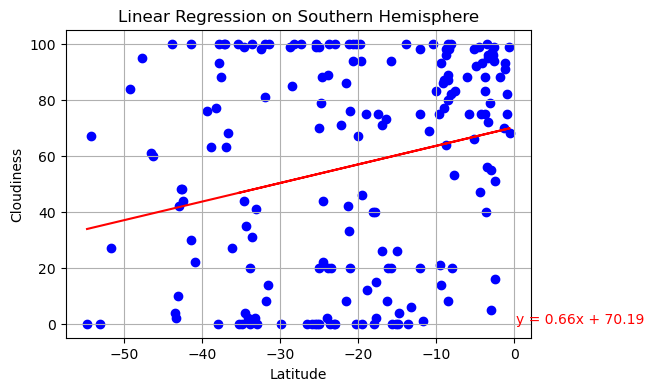

The r-value is: 0.24216474210528027


In [21]:
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Cloudiness']
slope, intercept, r_value, p_value, std_err = st.linregress(x_value, y_value)
regress_values = southern_hemi_df['Lat'] * slope + intercept
plt.figure(figsize=(6, 4))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], color='blue')
plt.plot(southern_hemi_df['Lat'], regress_values, "r-")
plt.title('Linear Regression on Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation,(0.2,0.2),fontsize=10,color="red")
plt.show()
r_value =southern_hemi_df['Lat'].corr(southern_hemi_df['Cloudiness'])
print("The r-value is:", r_value)

**Discussion about the linear relationship:** In both plots for Northern and Southern Hemisphere the r value is lower than 0.5 which indicates that there is no statistical significane between the Latitude and Cloudiness in both hemispheres and shows a positive association.

### Wind Speed vs. Latitude Linear Regression Plot

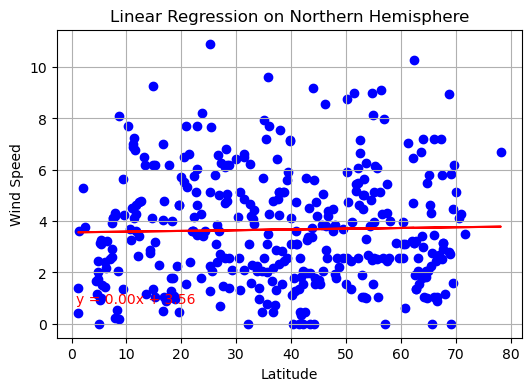

The r-value is: 0.0249235408697501


In [22]:
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Wind Speed']
slope, intercept, r_value, p_value, std_err = st.linregress(x_value, y_value)
regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.figure(figsize=(6, 4))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], color='blue')
plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.title('Linear Regression on Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation,(0.8,0.8),fontsize=10,color="red")
plt.show()
r_value =northern_hemi_df['Lat'].corr(northern_hemi_df['Wind Speed'])
print("The r-value is:", r_value)

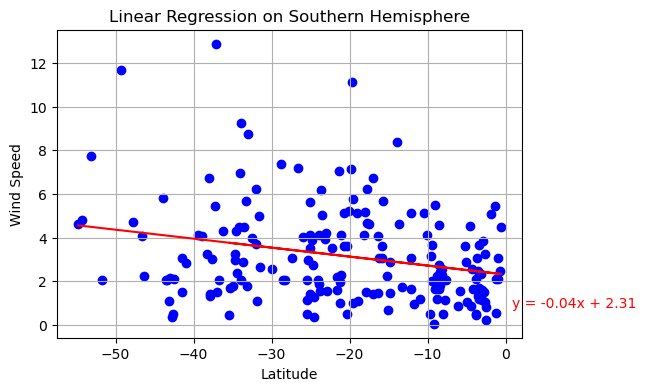

The r-value is: -0.25951875885891923


In [23]:
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Wind Speed']
slope, intercept, r_value, p_value, std_err = st.linregress(x_value, y_value)
regress_values = southern_hemi_df['Lat'] * slope + intercept
plt.figure(figsize=(6, 4))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], color='blue')
plt.plot(southern_hemi_df['Lat'], regress_values, "r-")
plt.title('Linear Regression on Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation,(0.8,0.8),fontsize=10,color="red")
plt.show()
r_value =southern_hemi_df['Lat'].corr(southern_hemi_df['Wind Speed'])
print("The r-value is:", r_value)

**Discussion about the linear relationship:** Based on the plots for both Northern and Southern Hemisphere, the r value is lower than 0.5 which indicates that there is no statistical significance between Latitude and Wind Speed in both hemispheres. The association between x and y in Northern Hemisphere is positive while in Southern Hemisphere is negative.